Generate from another sample
--

Set `outname` to be the base filename for the output file (stored to the *.generated* directory)

Set `c2file` to be the filename of the Codec2 encoded file containing the seed

Set `seed_start_index` to be one of: `"random"`, the frame number, or more conveniently the number of seconds into the audio (for example `"27s"`)

The generator takes several minutes to complete. It will not run if the `outname`_.wav_ file already exists.

The first 5 seconds of audio are the original seed data. The remaining audio is generated from the network model specified.

Starting generator - this could take some time
Generator complete


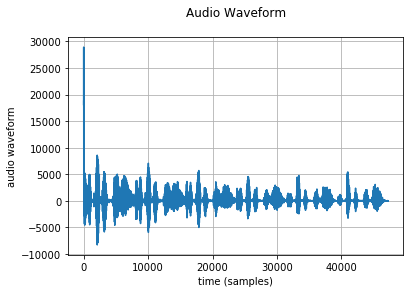

In [5]:
force_run = False

network_model = "func-26-1-2"
iter1 = 1200

fn_postfix = 'output_0_'+ str(iter1)
gen_fn = network_model + '_' + fn_postfix
c2file="test/critiquepracticalreason_00_kant_64kb.c2cb-3200"
seed_start_index = "1168"
generate_length = int(10 / 0.02)

outname=gen_fn+"-3200"

modelfn="out/" + network_model + "/model-" + str(iter1) + ".h5" 

import network_data as nd
import os
from subprocess import check_output, call
from IPython.display import display, Markdown, Audio, Image
home = os.environ.get('HOME')

os.chdir(home + "/store/c2gen")
if not force_run and os.path.isfile(home+'/store/c2gen/generated/'+outname+'.wav'):
    print("File", outname, "already exists")
else:  
    print("Starting generator - this could take some time")
    call(["python3", "lstm_c2_generation.py", network_model, "--generate="+gen_fn, "--generate-len="+str(generate_length), "--seed_index="+seed_start_index, c2file, modelfn])
    print("Generator complete")  
display(Audio(filename=home+"/store/c2gen/generated/"+outname+".wav"))  
os.chdir(home+"/store/c2gen/notebooks") 
  
nd.plot_gen_audio_waveform(outname) 

In [4]:
print(gen_fn)
nd.plot_codec_params(network_model,fn_postfix, scale_up='orig', loc='generated')
nd.plot_spec_params(network_model,fn_postfix, params='Voicing', loc='generated')
nd.plot_spec_params(network_model,fn_postfix, params='Wo', loc='generated')
nd.plot_spec_params(network_model,fn_postfix, params='E', loc='generated')
nd.plot_spec_params(network_model,fn_postfix, params='LSPs', loc='generated')

func-23-2-13_output_0_10


FileNotFoundError: [Errno 2] No such file or directory: '/home/phil/store/c2gen/generated/func-23-2-13'